# Exercise 5: Guessing Game
For this exercise, we will create a state machine that tries to guess a number we picked between an upper bound and a lower bound. Additionally, user is expected to provide a maximum number of guesses. Our state machine:
- Should loop until it correctly guesses or hit maximum guess number
- Every time there is a new guess, it should be informed if its guess is higher or lower than the picked number
- It needs to adjust its guesses based on this clue of higher or lower

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, END
import random

In [2]:
class AgentState(TypedDict):
    picked_number: int
    max_guesses: int
    counter: int
    upper_bound: int
    lower_bound: int
    guessed_correct: bool

In [3]:
def setup(state: AgentState) -> AgentState:
    """
    This node initialises certain variables as required
    """
    state['counter'] = 0
    state['guessed_correct'] = False
    return state

def guess(state: AgentState) -> AgentState:
    """
    This node generates one new guess and adjusts bounds if incorrect. Note that it doesn't define any exit conditions.
    """
    guess = random.randint(state['lower_bound'], state['upper_bound'])
    state['counter'] += 1
    if guess == state['picked_number']:
        state['guessed_correct'] = True
        return state
    elif guess > state['picked_number']:
        state['upper_bound'] -= 1
    elif guess < state['picked_number']:
        state['lower_bound'] += 1

    return state

In [4]:
def should_continue(state: AgentState) -> str:
    """
    This function defines exit conditions for the loop
    """
    if state['guessed_correct']:
        return "exit"
    elif state['upper_bound'] <= state['lower_bound']:
        return "exit"
    elif state['counter'] >= state['max_guesses']:
        return "exit"
    return "loop"

In [5]:
graph = StateGraph(AgentState)
graph.add_node(setup.__name__, setup)
graph.add_node(guess.__name__, guess)

graph.set_entry_point(setup.__name__)
graph.add_edge(setup.__name__, guess.__name__)

graph.add_conditional_edges(
    guess.__name__,
    should_continue,
    {
        "loop": guess.__name__,
        "exit": END
    }
)
app = graph.compile()

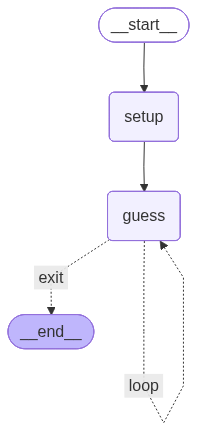

In [6]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
initial_state: AgentState = {
    "picked_number": 7,
    "max_guesses": 4,
    "upper_bound": 10,
    "lower_bound": 0
}

final_state: AgentState = app.invoke(initial_state)
isCorrect = "incorrect"
if (final_state['guessed_correct']):
    isCorrect = "correct"
print(f"Your machine guesses {isCorrect} after {final_state['counter']} attempts!")

Your machine guesses incorrect after 4 attempts!
